In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# To get idea of table, I ran a SQL statement of first 5 rows using .fetchall()
engine.execute('select * from measurement limit 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# To view the columns of the table, I use the inspect function and for loop to show 'name' and 'type'
# Creat a reflection of table - check using type()
inspector = inspect(engine)

# Unpack 'measurement' and 'station' tables into a lists
columns_m = inspector.get_columns('measurement')
columns_s = inspector.get_columns('station')

# Print using for loop
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Explore data to see if there are NaN values. Use .dropna() to remove from data (also could use .fillna())
session.query(Measurement.date, Measurement.prcp).filter(Measurement.prcp == None).limit(5).all()

[('2010-01-06', None),
 ('2010-01-30', None),
 ('2010-02-03', None),
 ('2010-02-19', None),
 ('2010-03-11', None)]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# Using a query of the last date in table, a year's data starts '2016-08-23'
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(5).all()

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

In [14]:
# Perform a query to retrieve the data and precipitation scores
# Queried the 'date' and 'prcp' from Class Measurements (table) and filtered and ordered by date 
data_prcp = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())\
    .filter(Measurement.date > '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_prcp, columns=['Date', 'Precipitation'])
df.dropna(axis=0, how='any', inplace=True)
df = df.set_index('Date')

# Sort the dataframe by date
df.sort_values(by='Date', ascending=True, inplace=True)

# Display dataframe
df

,Precipitation
Date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,1.22
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


In [15]:
# View list created by session.query to make sure it's the data you need
data_prcp[:5]

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

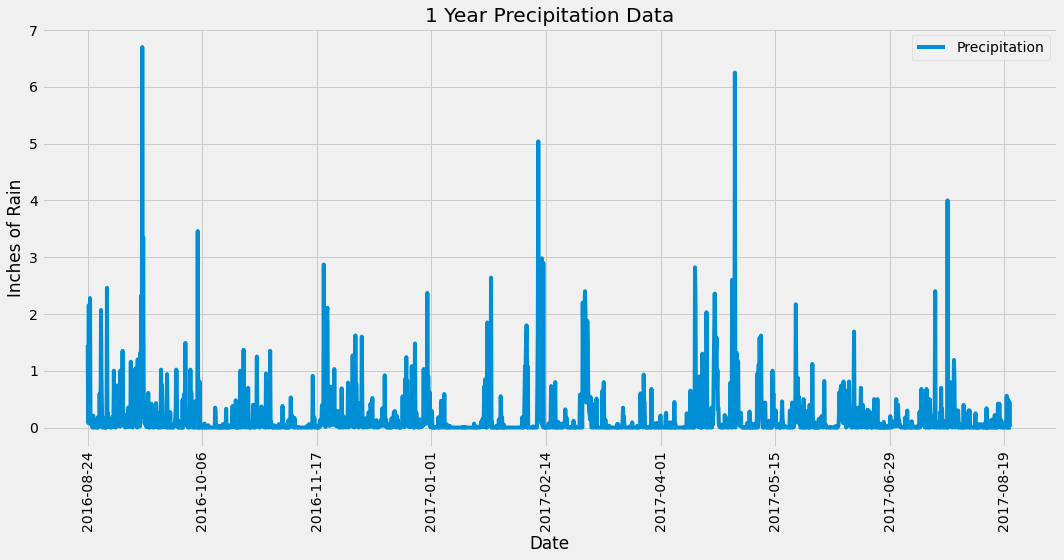

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='Precipitation', title='1 Year Precipitation Data', rot = 90, figsize=(15,8))
plt.ylabel('Inches of Rain')
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# EXPLORE 'station' DATA

# Find column names for 'station' table
columns_s = inspector.get_columns('station')

# Print using for loop
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [62]:
# To get idea of table data, I ran a SQL statement of first 5 rows using .fetchall()
engine.execute('select * from station limit 9').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [40]:
# Design a query to show how many stations are available in this dataset?

# I ran queries on both tables and found both had the same about of stations
session.query(Station.name).group_by(Station.name).count()
station_num = session.query(Measurement.station).group_by(Measurement.station).count()

print(f'There are {station_num} Stations in this dataset.')

There are 9 Stations in this dataset.


In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# In this query I used func.count(), group_by(), and order_by()
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
station_max = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).first()
print(f'Station ID {station_max[0]} is the most active station and recorded the highest number of observations.')

Station ID USC00519281 is the most active station and recorded the highest number of observations.


In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Lowest temperature query
station_low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The lowest temperature recorded at station ID {station_max[0]} was {station_low_temp[0]} degrees.')

# Highest temperature query
station_hi_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The highest temperature recorded at station ID {station_max[0]} was {station_hi_temp[0]} degrees.')

# Highest temperature query
station_avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The average temperature recorded at station ID {station_max[0]} was {station_avg_temp[0]} degrees.')

 The lowest temperature recorded at station ID USC00519281 was 54.0 degrees.
 The highest temperature recorded at station ID USC00519281 was 85.0 degrees.
 The average temperature recorded at station ID USC00519281 was 71.66378066378067 degrees.


In [95]:
# An alternative method for a datafram output. This version uses *sel decorator and
# then creates a 'statement' out of the SQL Object, finally it 'binds' the object
# to the 'session'. Afterwards you can rename the columns. 

sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

station_values = session.query(*sel).filter(Measurement.station == station_max[0])
station_df = pd.read_sql(selected_station.statement, selected_station.session.bind)
station_df.rename(columns={'station': 'Station',
                          'min_1': 'Min Temp',
                          'max_1': 'Max Temp',
                          'avg_1': 'Avg Temp'}, 
                          inplace=True
                 )

station_df

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


In [98]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12months = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.station == station_max[0])\
    .filter(Measurement.date > '2016-08-23')
station_12months.all()


[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

## Bonus Challenge Assignment

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
